In [52]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import copy
import math

In [214]:
image = cv2.imread('sar_3.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

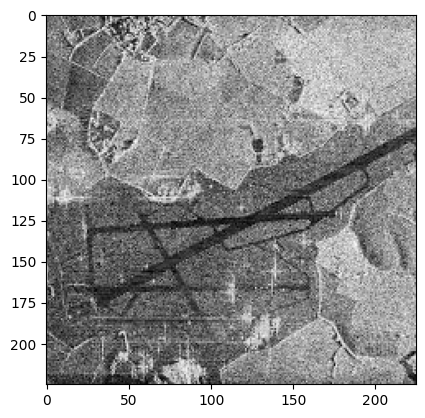

In [215]:
plt.imshow(image, cmap='gray')

# Наиболее протяженный участок

In [85]:
canny = cv2.Canny(image_gray, 50, 150,apertureSize = 3)

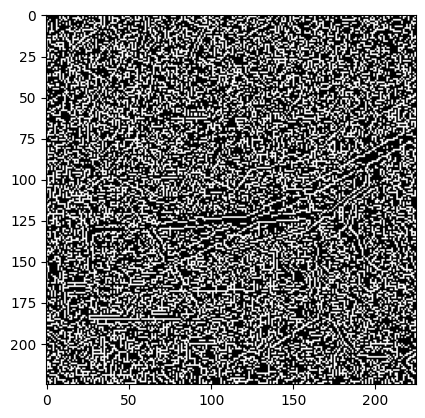

In [86]:
plt.imshow(canny, cmap='gray')

In [87]:
lines = cv2.HoughLines(canny, 1, np.pi / 180, 140)

In [88]:
image_lines = image.copy()
max_line = None
max_len = 0

if lines is not None:
    for i in range(0, len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
        pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))

        length = np.sqrt((pt2[0] - pt1[0])**2 + (pt2[1] - pt1[1])**2)

        if length > max_len:
            max_len = length
            max_line = (pt1, pt2, rho, theta)

if max_line is not None:
    pt1, pt2, rho, theta = max_line
    cv2.line(image_lines, max_line[0], max_line[1], (255,0,0), 3, cv2.LINE_AA)

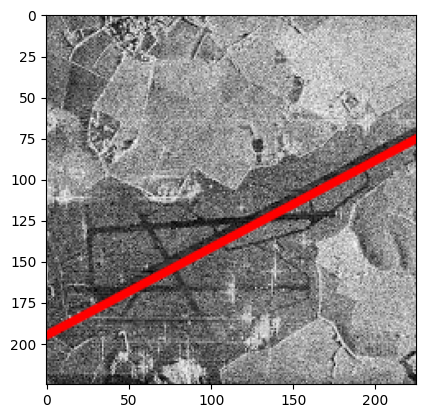

In [89]:
plt.imshow(image_lines, cmap='gray')

# Алгоритмы бинаризации

In [203]:
bin_img = copy.deepcopy(image_gray)
T  = 45
bin_img[image_gray < T] = 0
bin_img[image_gray >= T] = 255

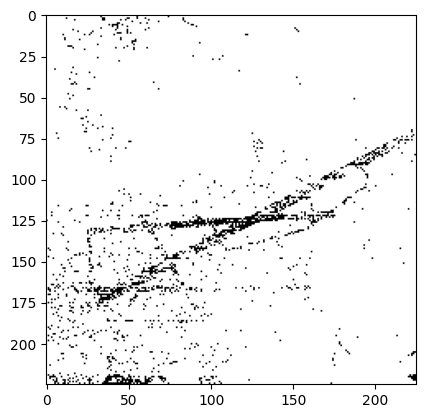

In [204]:
plt.imshow(bin_img, cmap="gray")

In [92]:
_,th2 = cv2.threshold(image_gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

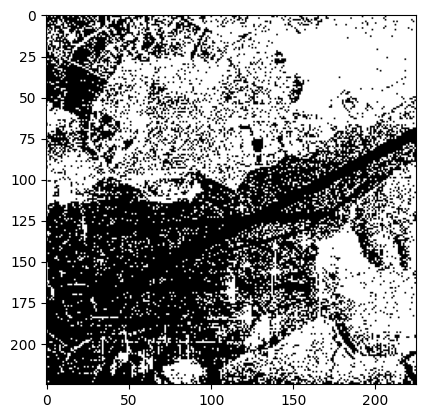

In [93]:
plt.imshow(th2, cmap="gray")

In [353]:
th3 = cv2.adaptiveThreshold(image_gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,1001, 61)

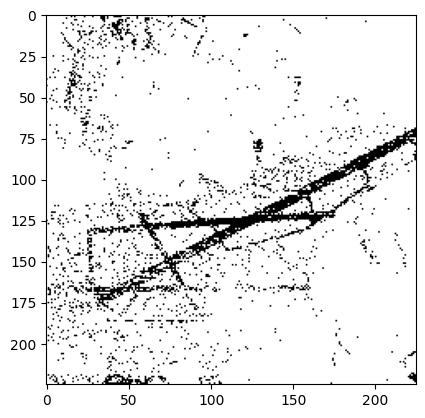

In [344]:
plt.imshow(th3, cmap="gray")

In [96]:
scale = 1
delta = 0
ddepth = cv2.CV_16S
grad_x = cv2.Sobel(image_gray, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
grad_y = cv2.Sobel(image_gray, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)

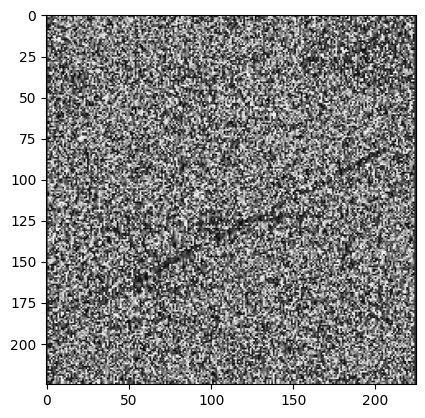

In [97]:
plt.imshow((grad_x - grad_x.min())*255, cmap="gray")

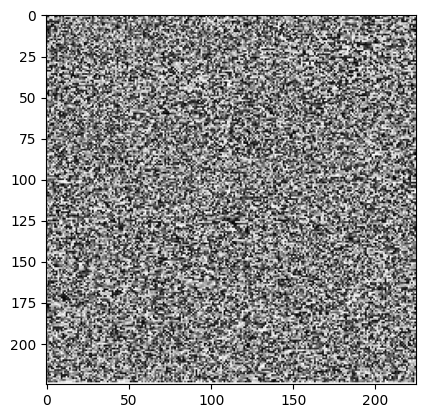

In [98]:
plt.imshow((grad_y - grad_y.min())*255, cmap="gray")

In [99]:
grad = cv2.addWeighted(grad_x, 0.5, grad_y, 0.5,0.0)

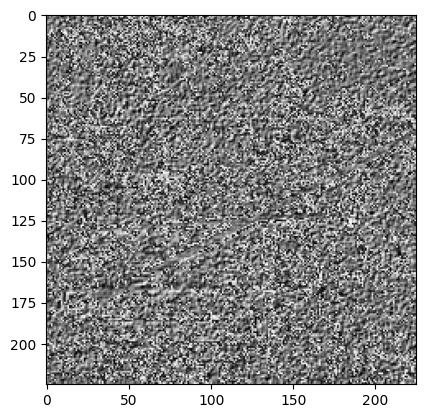

In [100]:
plt.imshow((grad - grad.min())*255, cmap="gray")

# Выделение дороги

In [355]:
blur = cv2.GaussianBlur(th3, (9, 9), 0)
canny = cv2.Canny(blur, 50, 150, apertureSize=3)
lines = cv2.HoughLinesP(canny, 1, np.pi / 180, threshold=60, maxLineGap=15)

lane_image = image.copy()
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(lane_image, (x1, y1), (x2, y2), (0, 255, 0), 2)



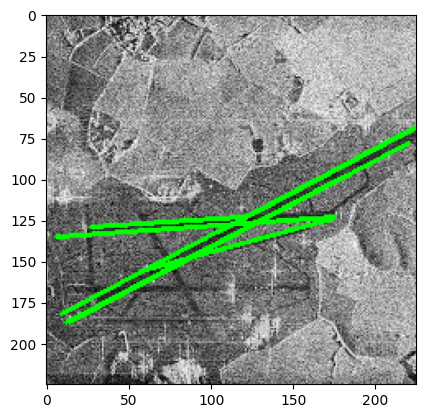

In [356]:
plt.imshow(lane_image, cmap = "grey")